#**Time Series Analysis**

Data set used :
<br>
https://www.kaggle.com/datasets/henriupton/electricity-dayahead-prices-entsoe
<br>
<hr>
<br>
<p>The dataset used provides hourly day ahead electricity prices for France and interconnections, sourced from the ENTSO-E Transparency Platform.</p>
<p>Electricity day ahead prices refer to the prices at which electricity is bought and sold in the wholesale market for delivery the next day. These prices are determined through a process called day-ahead market (DAM) auctions, where electricity generators and suppliers submit bids and offers for the electricity they are willing to buy or sell for delivery the following day.</p>

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming you have a time series dataset with a datetime index
# If not, you can convert your dataset to have a datetime index

# Read your time series data
# Replace 'your_dataset.csv' with your actual dataset file
df = pd.read_csv('electricity_dah_prices[1].csv')


In [37]:
df

,date,hour,france,italy,belgium,spain,uk,germany
0,2022/01/01,00:00 - 01:00,89.06,170.28,82.02,145.86,0.27,50.05
1,2022/01/01,01:00 - 02:00,78.48,155.72,67.07,114.90,-0.01,41.33
2,2022/01/01,02:00 - 03:00,85.16,147.09,75.11,113.87,0.27,43.22
3,2022/01/01,03:00 - 04:00,50.00,91.00,50.91,97.80,-0.01,45.46
4,2022/01/01,04:00 - 05:00,37.67,104.00,37.67,97.80,-0.01,37.67
...,...,...,...,...,...,...,...,...
8756,2022/12/31,19:00 - 20:00,18.11,333.00,22.09,18.11,228.00,-1.01
8757,2022/12/31,20:00 - 21:00,7.60,310.00,10.55,7.60,204.38,-1.39
8758,2022/12/31,21:00 - 22:00,3.69,270.00,5.22,3.69,175.23,-1.04
8759,2022/12/31,22:00 - 23:00,1.88,217.78,2.39,1.88,177.39,-1.07


In [38]:
# Combine 'date' and 'hour' columns into a single datetime column
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['hour'].str.split(' - ', expand=True)[0])
df.set_index('datetime', inplace=True)

In [39]:
df.dropna(inplace=True)

In [40]:
# Assuming you have columns for different countries like 'france', 'italy', etc.
# Replace 'france', 'italy', etc. with your actual column names
countries = ['france', 'italy', 'belgium', 'spain', 'uk', 'germany']

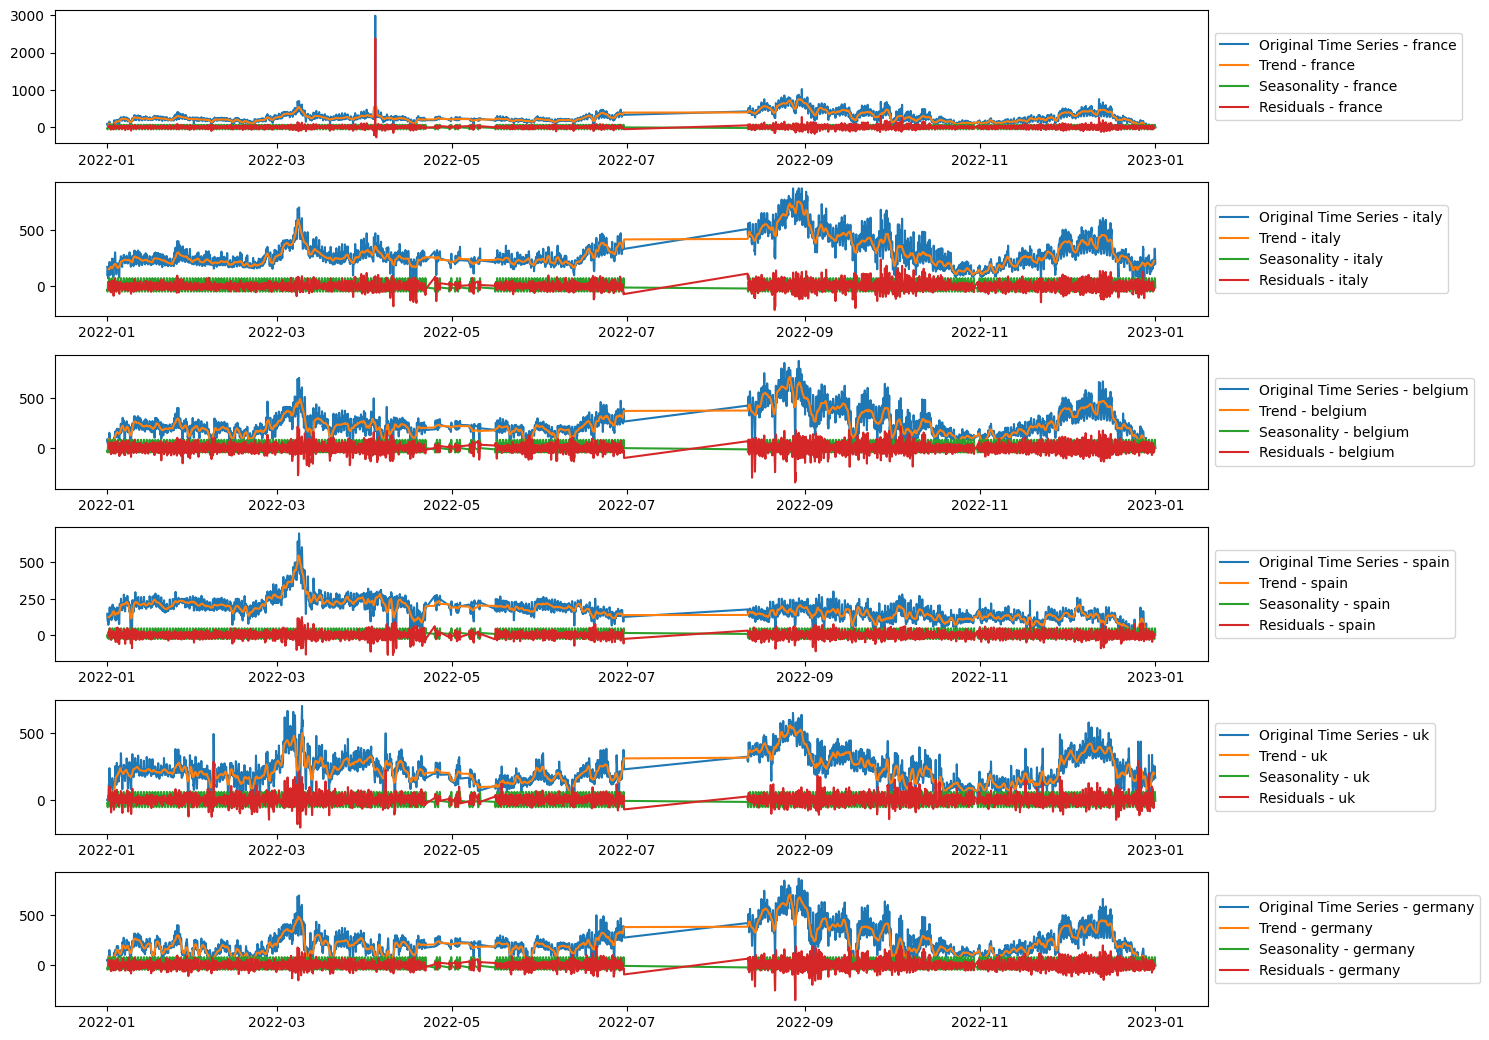

In [41]:
# Specify the period for seasonality (assuming daily seasonality with 24 hours per day)
seasonal_period = 24

# Perform time series decomposition for each country
plt.figure(figsize=(15, 12))

for country in countries:
    ts = df[country]

    # Perform time series decomposition with a specified period
    result = seasonal_decompose(ts, model='additive', period=seasonal_period)

    # Plot the original time series, trend, seasonality, and residuals for each country
    plt.subplot(len(countries)+1, 1, countries.index(country)+1)
    plt.plot(ts, label=f'Original Time Series - {country}')
    plt.plot(result.trend, label=f'Trend - {country}')
    plt.plot(result.seasonal, label=f'Seasonality - {country}')
    plt.plot(result.resid, label=f'Residuals - {country}')

    # Move the legend to the right of the plot
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

In [9]:
# Keep every 25th row
df_downsampled = df[::25]
df_downsampled

,date,hour,france,italy,belgium,spain,uk,germany
datetime,,,,,,,,
2022-01-01 00:00:00,2022/01/01,00:00 - 01:00,89.06,170.28,82.02,145.86,0.27,50.05
2022-01-02 01:00:00,2022/01/02,01:00 - 02:00,52.59,142.85,52.59,115.87,60.00,52.59
2022-01-03 02:00:00,2022/01/03,02:00 - 03:00,1.24,84.62,-0.99,154.64,-10.00,-0.07
2022-01-04 03:00:00,2022/01/04,03:00 - 04:00,105.81,105.81,107.07,105.81,128.71,103.41
2022-01-05 04:00:00,2022/01/05,04:00 - 05:00,79.11,79.11,79.11,79.11,172.00,79.11
...,...,...,...,...,...,...,...,...
2022-12-27 01:00:00,2022/12/27,01:00 - 02:00,91.00,91.00,56.66,91.00,192.90,9.98
2022-12-28 02:00:00,2022/12/28,02:00 - 03:00,11.20,46.99,10.39,22.90,175.00,10.31
2022-12-29 03:00:00,2022/12/29,03:00 - 04:00,-1.44,113.74,-2.06,0.10,-25.00,-2.18


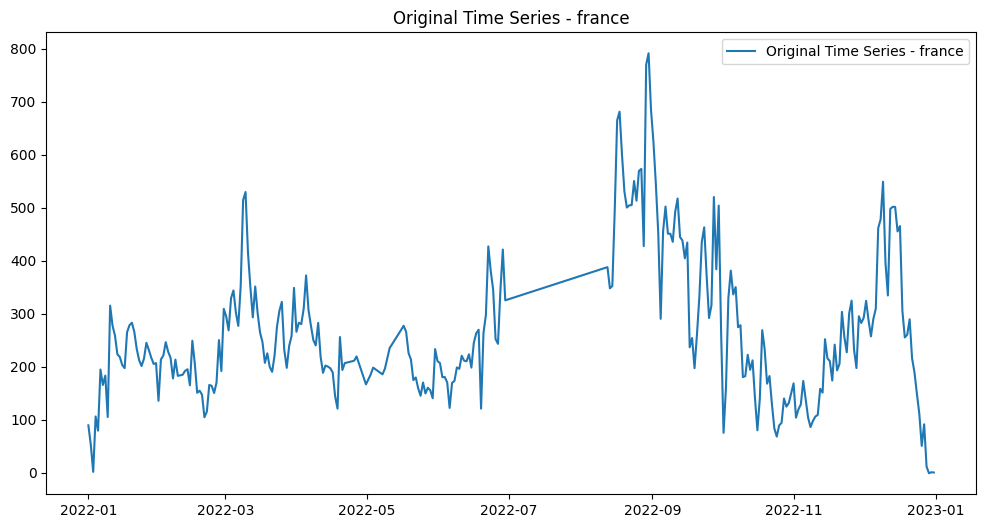

In [29]:
# Assuming you have columns for different countries like 'france', 'italy', etc.
# Replace 'france', 'italy', etc. with your actual column names
country = 'france'

# Specify the period for hourly seasonality (24 hours)
seasonal_period = 24

# Plot the original time series
plt.figure(figsize=(12, 6))
plt.plot(df_downsampled[country], label=f'Original Time Series - {country}')
plt.title(f'Original Time Series - {country}')
plt.legend()
plt.show()


In [11]:
from pmdarima import auto_arima
# Use auto_arima to automatically select the best ARIMA model
# Adjust the seasonal parameter based on your data characteristics
#arima_model = auto_arima(df[country], seasonal=True, m=seasonal_period, trace=True, suppress_warnings=True)
arima_model = auto_arima(df_downsampled[country], seasonal=True, m=seasonal_period, trace=True, suppress_warnings=True, n_jobs=1)

# Print the summary of the best ARIMA model
print(arima_model.summary())


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[24] intercept   : AIC=inf, Time=6.81 sec
 ARIMA(0,0,0)(0,0,0)[24] intercept   : AIC=3713.505, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[24] intercept   : AIC=3284.809, Time=2.29 sec
 ARIMA(0,0,1)(0,0,1)[24] intercept   : AIC=3494.096, Time=0.81 sec
 ARIMA(0,0,0)(0,0,0)[24]             : AIC=4169.265, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[24] intercept   : AIC=3282.815, Time=0.14 sec
 ARIMA(1,0,0)(0,0,1)[24] intercept   : AIC=3284.809, Time=1.20 sec
 ARIMA(1,0,0)(1,0,1)[24] intercept   : AIC=3286.808, Time=1.06 sec
 ARIMA(2,0,0)(0,0,0)[24] intercept   : AIC=3284.533, Time=0.26 sec
 ARIMA(1,0,1)(0,0,0)[24] intercept   : AIC=3284.471, Time=0.23 sec
 ARIMA(0,0,1)(0,0,0)[24] intercept   : AIC=3497.561, Time=0.12 sec
 ARIMA(2,0,1)(0,0,0)[24] intercept   : AIC=3281.414, Time=0.64 sec
 ARIMA(2,0,1)(1,0,0)[24] intercept   : AIC=3284.592, Time=3.87 sec
 ARIMA(2,0,1)(0,0,1)[24] intercept   : AIC=3283.903, Time=5.69 sec
 ARIMA(2,0,1)(1,0,1)[24]

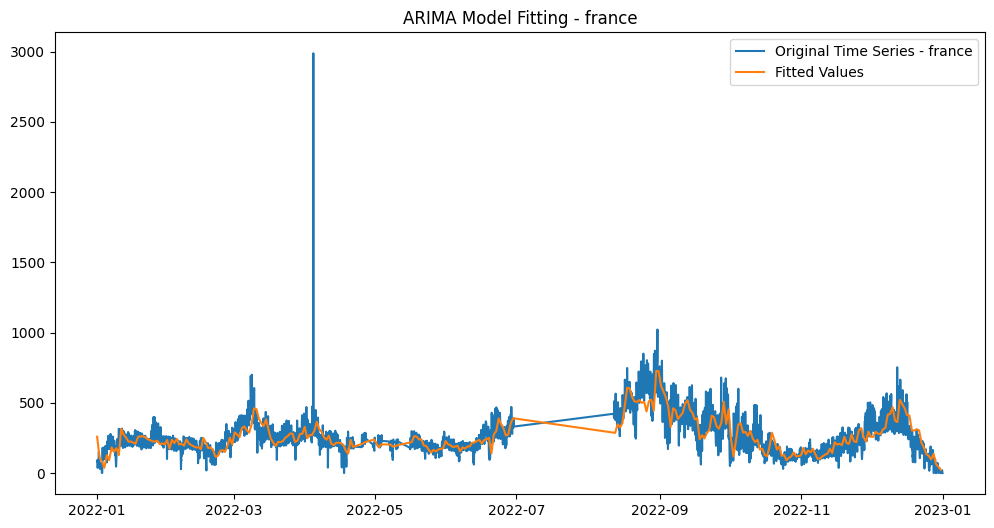

In [12]:
# Plot the fitted values
plt.figure(figsize=(12, 6))
plt.plot(df[country], label=f'Original Time Series - {country}')
plt.plot(arima_model.predict_in_sample(), label='Fitted Values')
plt.title(f'ARIMA Model Fitting - {country}')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


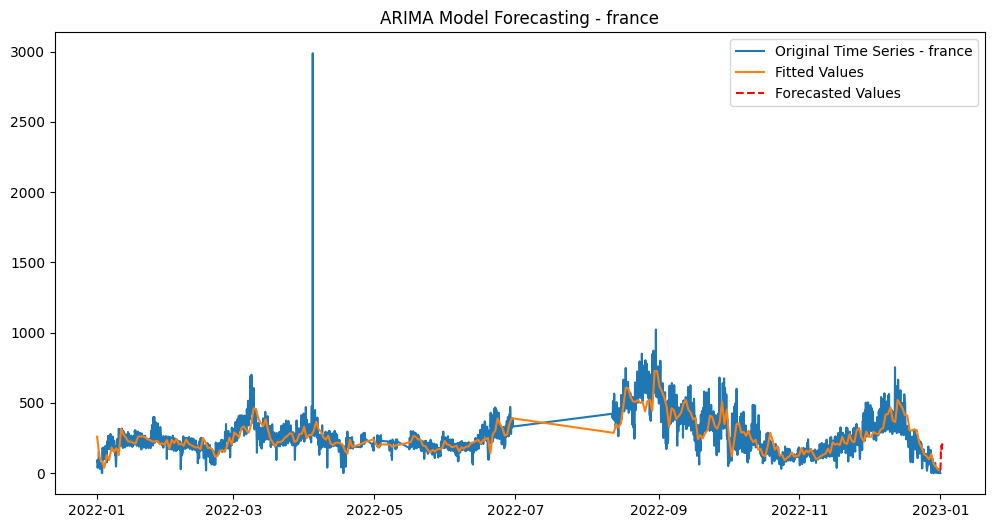

In [13]:
# Forecast future values
forecast_steps = 24  # adjust as needed
forecast = arima_model.predict(n_periods=forecast_steps)
forecast_index = pd.date_range(start=df.index[-1] + pd.Timedelta(hours=1), periods=forecast_steps, freq='H')
plt.figure(figsize=(12, 6))
plt.plot(df[country], label=f'Original Time Series - {country}')
plt.plot(arima_model.predict_in_sample(), label='Fitted Values')
plt.plot(forecast_index, forecast, label='Forecasted Values', linestyle='--', color='red')
plt.title(f'ARIMA Model Forecasting - {country}')
plt.legend()
plt.show()